In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [9]:
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [3]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')


validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

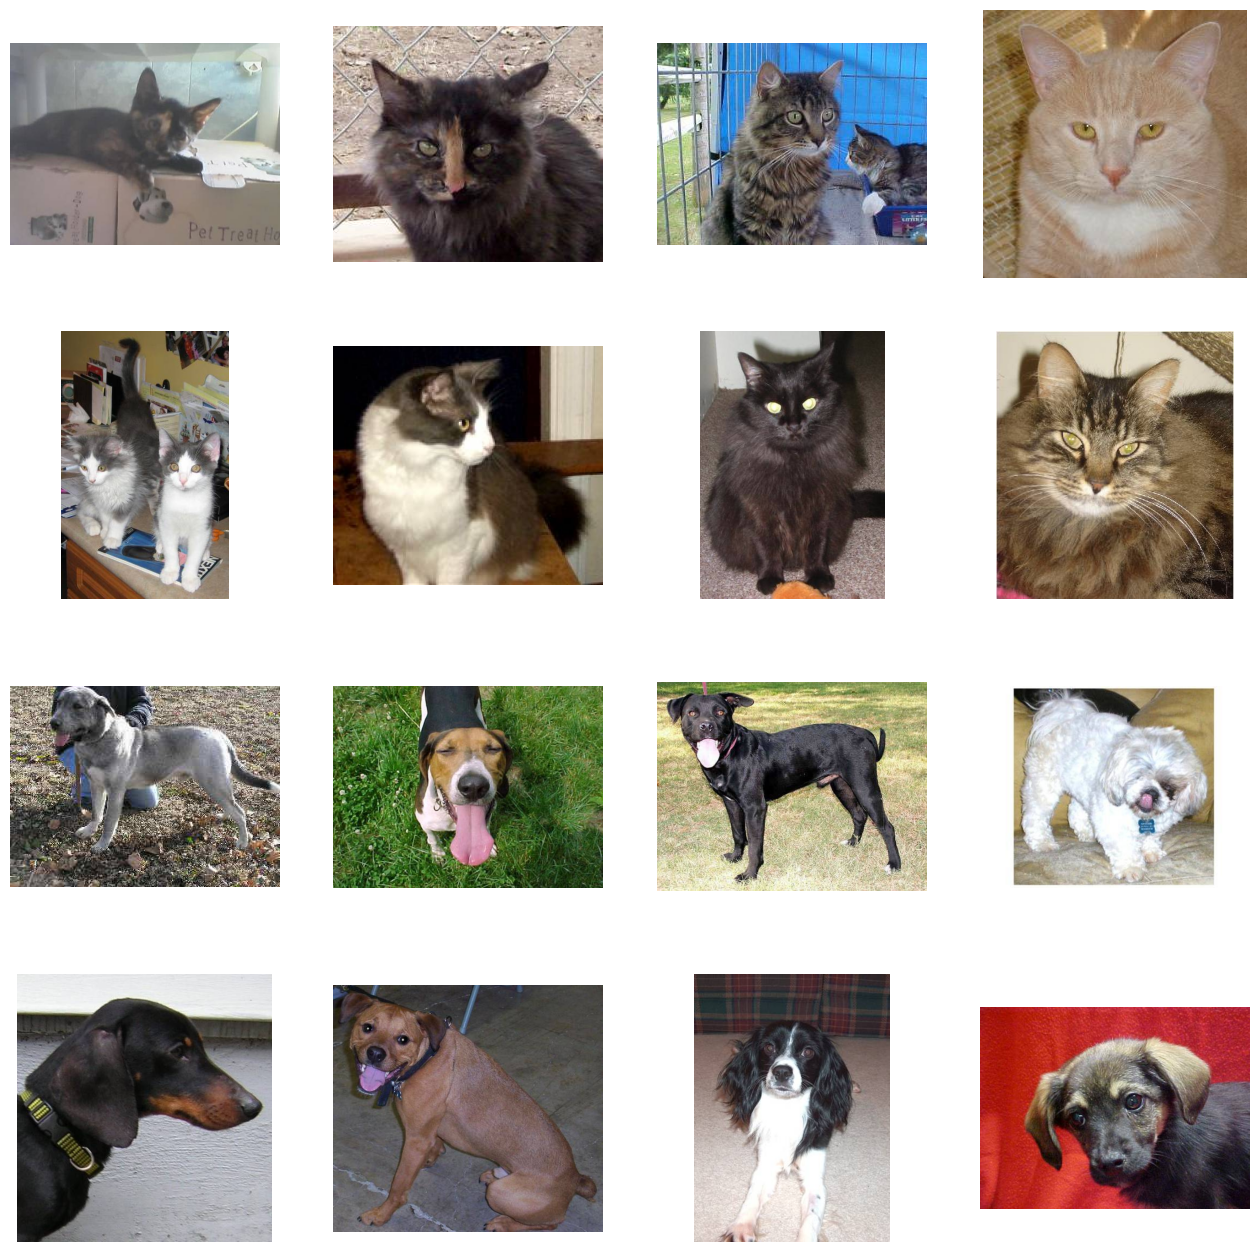

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index = 100
train_cat_fnames = os.listdir(train_cats_dir )
train_dog_fnames = os.listdir(train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index]]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.
)

In [21]:
#Step 2: Training and Validation Sets
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(224, 224)
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(224, 224)
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications.vgg16 import VGG16

In [23]:
base_model = VGG16(
    input_shape=(224, 224, 3), # Shape of our images
    include_top=False, # Leave out the last fully connected layer
    weights='imagenet'
)
for layer in base_model.layers:
  layer.trainable = False

In [24]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='softmax')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004), loss ='binary_crossentropy',metrics = ['acc'])


In [25]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 579ms/step - acc: 0.4841 - loss: 0.9978 - val_acc: 0.5002 - val_loss: 0.3082
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 639ms/step - acc: 0.4832 - loss: 0.3989 - val_acc: 0.5002 - val_loss: 0.2648
Epoch 3/5
 51/100 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step - acc: 0.4860 - loss: 0.3366

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - acc: 0.4965 - loss: 0.3422 - val_acc: 0.5002 - val_loss: 0.2679
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 515ms/step - acc: 0.5046 - loss: 0.3396 - val_acc: 0.5002 - val_loss: 0.2254
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 527ms/step - acc: 0.5026 - loss: 0.3331 - val_acc: 0.5002 - val_loss: 0.2113


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step


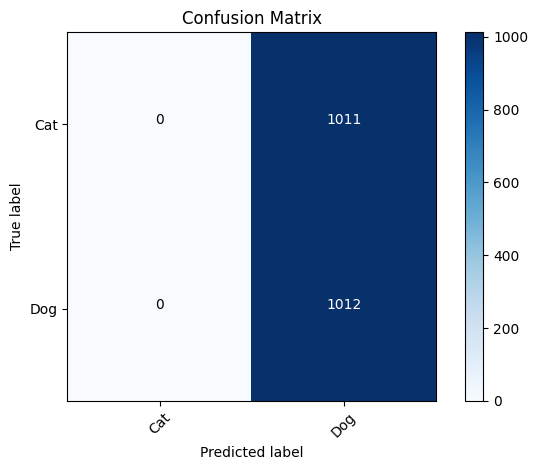

In [26]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict on the validation data
predictions = model.predict(validation_generator)
y_pred = np.round(predictions) # Round predictions to get binary labels

# Get true labels
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2) # Assuming binary classification
plt.xticks(tick_marks, ['Cat', 'Dog'], rotation=45)
plt.yticks(tick_marks, ['Cat', 'Dog'])

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [28]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    class_mode='binary',
    target_size=(150, 150)
)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=16,
    class_mode='binary',
    target_size=(150, 150)
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [30]:
base_model = InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)
#Step 4: Compile and Fit
#Just like VGG-16, we will only change the last layer.
for layer in base_model.layers:
  layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])
#We will then fit the image classification model:
inc_history = model.fit(
 train_generator,
 validation_data=validation_generator,
 steps_per_epoch=100,
 epochs=10
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - acc: 0.8507 - loss: 0.9647 - val_acc: 0.9525 - val_loss: 0.2480
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - acc: 0.9007 - loss: 0.5711 - val_acc: 0.9530 - val_loss: 0.1902
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - acc: 0.9105 - loss: 0.3881 - val_acc: 0.9530 - val_loss: 0.1942
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - acc: 0.8948 - loss: 0.3996 - val_acc: 0.9585 - val_loss: 0.1304
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - acc: 0.9043 - loss: 0.2723 - val_acc: 0.9521 - val_loss: 0.1439
Epoch 6/10
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.8750 - loss: 0.2102

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - acc: 0.8750 - loss: 0.2102 - val_acc: 0.9585 - val_loss: 0.1233
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 159ms/step - acc: 0.9162 - loss: 0.1945 - val_acc: 0.9471 - val_loss: 0.1470
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - acc: 0.9148 - loss: 0.2270 - val_acc: 0.9580 - val_loss: 0.1195
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - acc: 0.9172 - loss: 0.2144 - val_acc: 0.9619 - val_loss: 0.1001
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - acc: 0.9255 - loss: 0.2051 - val_acc: 0.9525 - val_loss: 0.1241


127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step


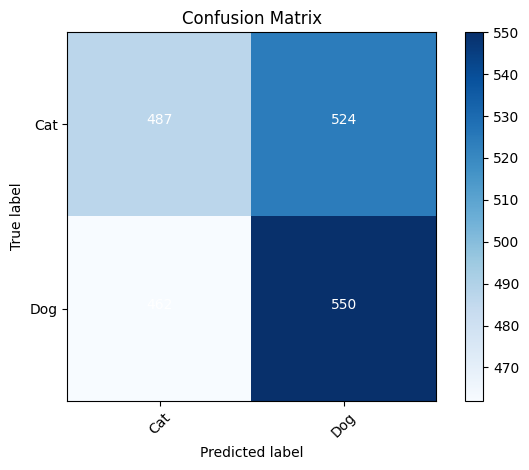

In [34]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict on the validation data
predictions = model.predict(validation_generator)
y_pred = np.round(predictions) # Round predictions to get binary labels

# Get true labels
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2) # Assuming binary classification
plt.xticks(tick_marks, ['Cat', 'Dog'], rotation=45)
plt.yticks(tick_marks, ['Cat', 'Dog'])

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()